In [1]:
import pandas as pd
import torch
import numpy as np
import pandas as pd
from transformers import AutoModel, AutoTokenizer

# Load the CodeT5+ model and tokenizer
checkpoint = "Salesforce/codet5p-110m-embedding"
device = "cuda" if torch.cuda.is_available() else "cpu"

tokenizer = AutoTokenizer.from_pretrained(checkpoint, trust_remote_code=True)
model = AutoModel.from_pretrained(checkpoint, trust_remote_code=True).to(device)

In [2]:
# Load your dataset
data = pd.read_csv(r"C:\Users\LENOVO T 470S\Downloads\Sample_Dataset(Java).csv", encoding='ISO-8859-1')
df = pd.DataFrame(data)
df

,Question,Correct Solution
0,Reverse a String,public String reverseString(String s) {\n r...
1,Reverse a String,public String reverseString(String s) {\n S...
2,Reverse a String,public String reverseString(String s) {\n i...
3,Reverse a String,public String reverseString(String s) {\n S...
4,Reverse a String,public String reverseString(String s) {\n c...
...,...,...
145,Convert List of Tuples to Dictionary,"public static <K, V> Map<K, V> convert(List<Pa..."
146,Convert List of Tuples to Dictionary,"public static <K, V> Map<K, V> convert(List<Pa..."
147,Convert List of Tuples to Dictionary,"public static <K, V> Map<K, V> convert(List<Pa..."
148,Convert List of Tuples to Dictionary,"public static <K, V> Map<K, V> convert(List<Pa..."


In [3]:
# Function to encode data in batches (using raw code instead of AST)
def encode_data_batch(df, model, tokenizer, device, start_row, end_row):
    embeddings = []
    for i in range(start_row, end_row):
        code = df['Correct Solution'][i]  # Replace 'Correct Solution' with your raw code column
        if pd.isna(code):
            continue  # Skip if the code is NaN or None
        inputs = tokenizer.encode(code, return_tensors="pt", max_length=512, truncation=True).to(device)
        with torch.no_grad():
            embedding = model(inputs)[0].cpu().numpy()  # Use embeddings (mean pooling for example)
        embeddings.append(embedding)
    return embeddings

# Process the data in batches
batch_size = 300
all_embeddings = []

start_row = 0
while start_row < len(df):
    end_row = min(start_row + batch_size, len(df))
    embeddings_batch = encode_data_batch(df, model, tokenizer, device, start_row, end_row)
    all_embeddings.extend(embeddings_batch)
    start_row = end_row

# Convert to numpy array and reshape if necessary
embeddings_array = np.vstack(all_embeddings)

# Create DataFrame from embeddings
embedding_columns = [f'code_embedding_{i}' for i in range(embeddings_array.shape[1])]
embeddings_df = pd.DataFrame(embeddings_array, columns=embedding_columns)

# Display the DataFrame
embeddings_df


,code_embedding_0,code_embedding_1,code_embedding_2,code_embedding_3,code_embedding_4,code_embedding_5,code_embedding_6,code_embedding_7,code_embedding_8,code_embedding_9,...,code_embedding_246,code_embedding_247,code_embedding_248,code_embedding_249,code_embedding_250,code_embedding_251,code_embedding_252,code_embedding_253,code_embedding_254,code_embedding_255
0,-0.041946,-0.024564,-0.061726,0.007678,-0.104111,0.018873,-0.069172,-0.065853,0.075621,0.013165,...,-0.095160,0.054542,0.011785,0.034113,0.040809,-0.021886,0.035517,-0.039897,0.048504,0.033784
1,-0.044361,0.005548,-0.049420,-0.012005,-0.070751,0.007815,-0.082497,-0.030191,0.078139,0.005229,...,-0.094329,0.056654,-0.037838,0.058914,0.044670,-0.037058,0.007121,-0.056504,0.050029,0.023996
2,-0.029927,-0.003983,-0.040972,0.001885,-0.082416,-0.006662,-0.064431,-0.010264,0.095997,-0.024342,...,-0.087896,0.052563,-0.011924,0.049590,0.058092,-0.042309,0.013324,-0.008760,0.013236,0.035924
3,-0.045363,0.018463,-0.050143,0.000805,-0.078402,-0.007964,-0.082468,-0.049494,0.093098,-0.007991,...,-0.103566,0.078916,-0.023751,0.041588,0.023863,-0.018566,0.045735,-0.043835,0.057268,0.057398
4,-0.007887,0.035695,-0.029324,-0.000757,-0.061955,0.002993,-0.086779,-0.043553,0.081796,-0.000147,...,-0.119123,0.041004,-0.024915,0.022929,0.034739,-0.043856,0.010021,-0.041951,0.045660,0.032864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,-0.049128,-0.020330,-0.053922,0.046142,-0.093224,-0.004082,0.040716,-0.058070,0.035445,0.011491,...,-0.118127,0.022268,-0.073268,-0.035755,-0.040580,-0.051009,0.031640,0.037827,-0.013863,-0.054148
146,-0.065772,-0.030624,-0.009472,0.047633,-0.097633,-0.018132,0.022116,-0.036080,0.033227,0.010399,...,-0.092993,0.025875,-0.070552,-0.012798,-0.039170,-0.069786,0.026848,0.072446,-0.003016,-0.042545
147,-0.054392,-0.015165,-0.057365,0.046443,-0.089664,0.001714,0.043785,-0.061890,0.038181,0.004944,...,-0.115727,0.029968,-0.077958,-0.030293,-0.037533,-0.056943,0.026285,0.035254,-0.022775,-0.052652
148,-0.050860,-0.011293,-0.030833,0.048784,-0.087412,-0.008806,0.043526,-0.050476,0.029115,0.005024,...,-0.102951,0.016072,-0.074620,-0.031179,-0.025762,-0.050268,0.023491,0.049795,-0.022836,-0.054043


In [4]:
# Save the embeddings to a CSV file if needed
embeddings_df.to_csv('java_embeddings_codet5.csv', index=False)

In [5]:
from sklearn.cluster import DBSCAN

In [6]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

dbscan_labels = dbscan.fit_predict(embeddings_df)

df['Cluster'] = dbscan_labels

# Display the DataFrame with cluster labels
print(embeddings_df)

# Optionally, save the DataFrame with cluster labels to a CSV file
embeddings_df.to_csv('codet5_dbscan.csv', index=False)

     code_embedding_0  code_embedding_1  code_embedding_2  code_embedding_3  \
0           -0.041946         -0.024564         -0.061726          0.007678   
1           -0.044361          0.005548         -0.049420         -0.012005   
2           -0.029927         -0.003983         -0.040972          0.001885   
3           -0.045363          0.018463         -0.050143          0.000805   
4           -0.007887          0.035695         -0.029324         -0.000757   
..                ...               ...               ...               ...   
145         -0.049128         -0.020330         -0.053922          0.046142   
146         -0.065772         -0.030624         -0.009472          0.047633   
147         -0.054392         -0.015165         -0.057365          0.046443   
148         -0.050860         -0.011293         -0.030833          0.048784   
149         -0.052246         -0.017985         -0.059089          0.044457   

     code_embedding_4  code_embedding_5  code_embed

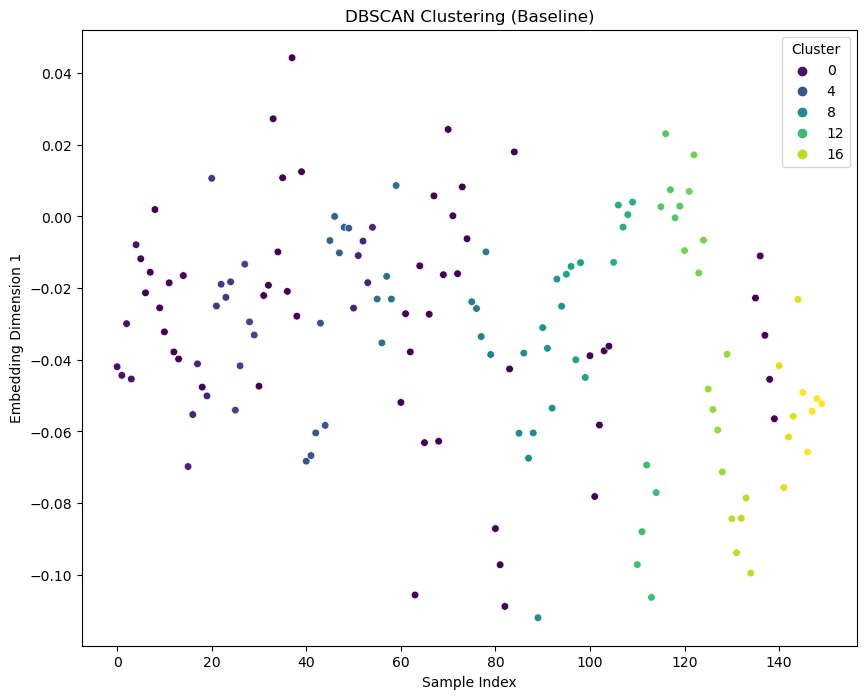

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot DBSCAN clusters without dimensionality reduction
plt.figure(figsize=(10, 8))
sns.scatterplot(data=embeddings_df, x=embeddings_df.index, y='code_embedding_0', hue=df['Cluster'], palette='viridis', s=30)
plt.title("DBSCAN Clustering (Baseline)")
plt.xlabel("Sample Index")
plt.ylabel("Embedding Dimension 1")
plt.legend(title='Cluster', loc='best')
plt.show()


In [11]:
import umap

# Initialize UMAP with desired parameters
umap_model = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean', random_state=42)

# Fit and transform the embeddings
umap_embeddings = umap_model.fit_transform(embeddings_df)

# Create a DataFrame from UMAP embeddings
umap_df = pd.DataFrame(umap_embeddings, columns=['UMAP1', 'UMAP2'])

# Display the UMAP DataFrame
print(umap_df)


D:\Anaconda\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


         UMAP1     UMAP2
0    -0.119004  4.927832
1    -0.178122  4.776927
2    -0.024045  4.974530
3    -0.204457  4.807359
4    -0.026896  4.840795
..         ...       ...
145  12.916160  3.199494
146  12.932734  3.191273
147  12.954797  3.163531
148  12.978409  3.145702
149  13.057825  3.069867

[150 rows x 2 columns]


In [12]:
import numpy as np

# Initialize DBSCAN with desired parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit DBSCAN to the UMAP embeddings
dbscan_labels = dbscan.fit_predict(umap_df)

# Add the cluster labels to the UMAP DataFrame
umap_df['Cluster'] = dbscan_labels

# Display the DataFrame with cluster labels
print(umap_df)

# Optionally, save the DataFrame with cluster labels to a CSV file
umap_df.to_csv('codet5_umap_dbscan.csv', index=False)




         UMAP1     UMAP2  Cluster
0    -0.119004  4.927832        0
1    -0.178122  4.776927        0
2    -0.024045  4.974530        0
3    -0.204457  4.807359        0
4    -0.026896  4.840795        0
..         ...       ...      ...
145  12.916160  3.199494       24
146  12.932734  3.191273       24
147  12.954797  3.163531       24
148  12.978409  3.145702       24
149  13.057825  3.069867       24

[150 rows x 3 columns]


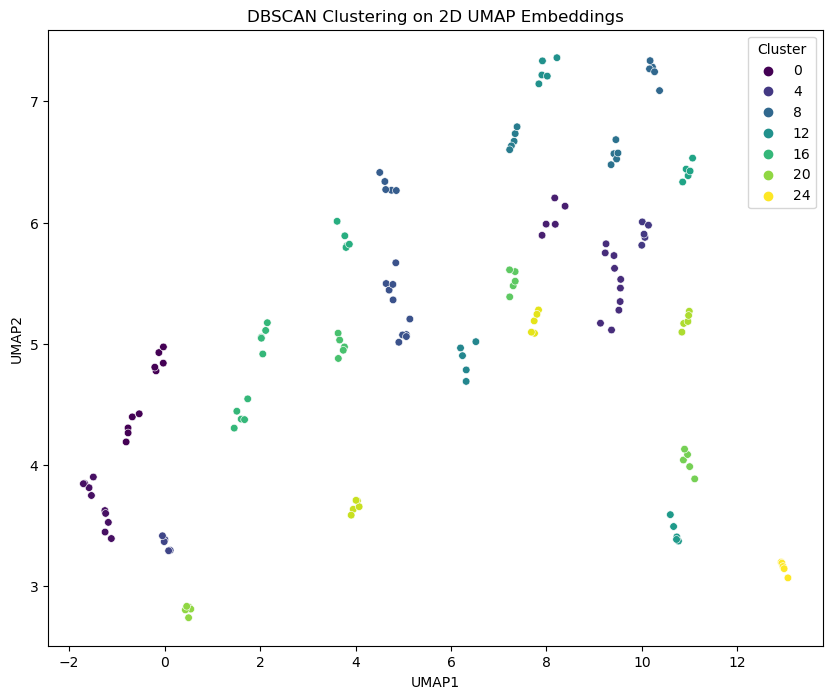

In [13]:
# Plot DBSCAN clusters on 2D UMAP embedding
plt.figure(figsize=(10, 8))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='Cluster', palette='viridis', s=30)
plt.title("DBSCAN Clustering on 2D UMAP Embeddings")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend(title='Cluster', loc='best')
plt.show()

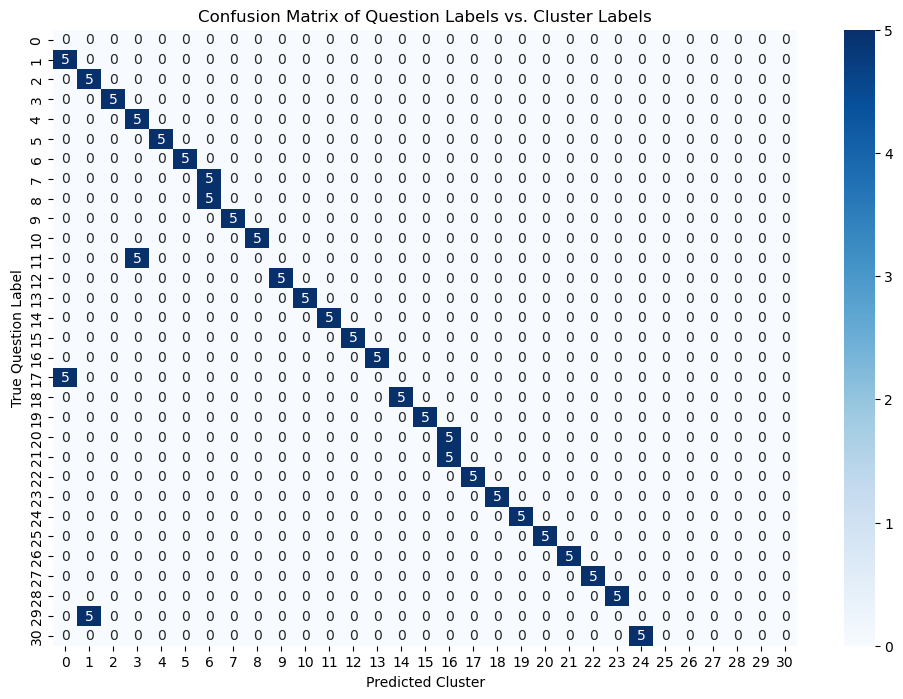

In [14]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assume `df` is your initial dataset with 150 rows and a column 'Question_ID' with question labels
# And `umap_df` contains the DBSCAN cluster labels after UMAP transformation

# 1. Create a DataFrame of true labels based on question numbers
# Assuming question numbers are labeled as 1, 2, ..., 30
true_labels = []
for question_num in range(1, 31):
    true_labels.extend([question_num] * 5)  # Each question has 5 solutions

# Add these true labels to the original dataset (or use it directly if already present)
df['True_Label'] = true_labels

# 2. Obtain predicted labels from DBSCAN clustering on UMAP 2D embeddings
predicted_labels = umap_df['Cluster']  # Use the 'Cluster' column from UMAP+DBSCAN clustering

# 3. Generate confusion matrix comparing true labels and cluster labels
conf_matrix = confusion_matrix(df['True_Label'], predicted_labels)

# 4. Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix of Question Labels vs. Cluster Labels")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Question Label")
plt.show()


In [16]:
# Initialize UMAP with 3 components for 3D embeddings
umap_model = umap.UMAP(n_neighbors=15, n_components=3, metric='euclidean', random_state=42)

# Fit and transform the embeddings
umap_embeddings = umap_model.fit_transform(embeddings_df)

# Create a DataFrame from UMAP embeddings
umap_df = pd.DataFrame(umap_embeddings, columns=['UMAP1', 'UMAP2', 'UMAP3'])

# Display the UMAP DataFrame
print(umap_df)

D:\Anaconda\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


         UMAP1     UMAP2     UMAP3
0     3.022753  7.960736  4.006669
1     3.098557  7.963060  4.229694
2     3.123067  8.050213  3.928923
3     3.004847  7.897026  4.078314
4     3.211009  7.988593  4.164083
..         ...       ...       ...
145  10.207639  6.797909  1.850280
146  10.135734  6.791234  1.763608
147  10.087769  6.839319  1.723655
148  10.150885  6.732225  1.775865
149  10.140010  6.790507  1.772568

[150 rows x 3 columns]


In [17]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit DBSCAN to the 3D UMAP embeddings
dbscan_labels = dbscan.fit_predict(umap_df)

# Add the cluster labels to the UMAP DataFrame
umap_df['Cluster'] = dbscan_labels

# Display the UMAP DataFrame with cluster labels
print(umap_df)

         UMAP1     UMAP2     UMAP3  Cluster
0     3.022753  7.960736  4.006669        0
1     3.098557  7.963060  4.229694        0
2     3.123067  8.050213  3.928923        0
3     3.004847  7.897026  4.078314        0
4     3.211009  7.988593  4.164083        0
..         ...       ...       ...      ...
145  10.207639  6.797909  1.850280       20
146  10.135734  6.791234  1.763608       20
147  10.087769  6.839319  1.723655       20
148  10.150885  6.732225  1.775865       20
149  10.140010  6.790507  1.772568       20

[150 rows x 4 columns]


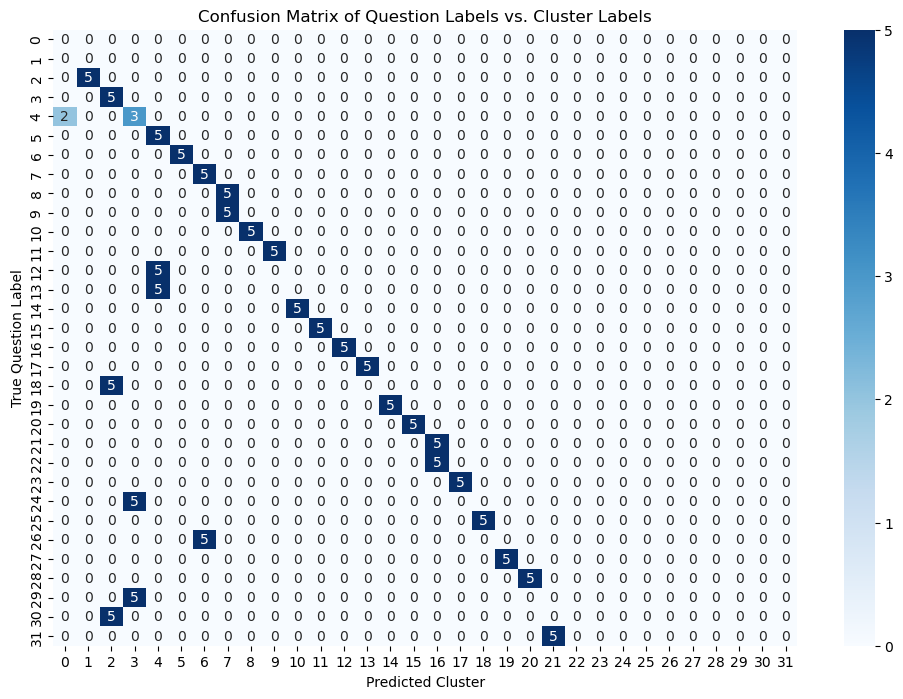

In [18]:
true_labels = []
for question_num in range(1, 31):
    true_labels.extend([question_num] * 5)  # Each question has 5 solutions

# Add these true labels to the original dataset (or use it directly if already present)
df['True_Label'] = true_labels

# 2. Obtain predicted labels from DBSCAN clustering on UMAP 2D embeddings
predicted_labels = umap_df['Cluster']  # Use the 'Cluster' column from UMAP+DBSCAN clustering

# 3. Generate confusion matrix comparing true labels and cluster labels
conf_matrix = confusion_matrix(df['True_Label'], predicted_labels)

# 4. Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix of Question Labels vs. Cluster Labels")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Question Label")
plt.show()


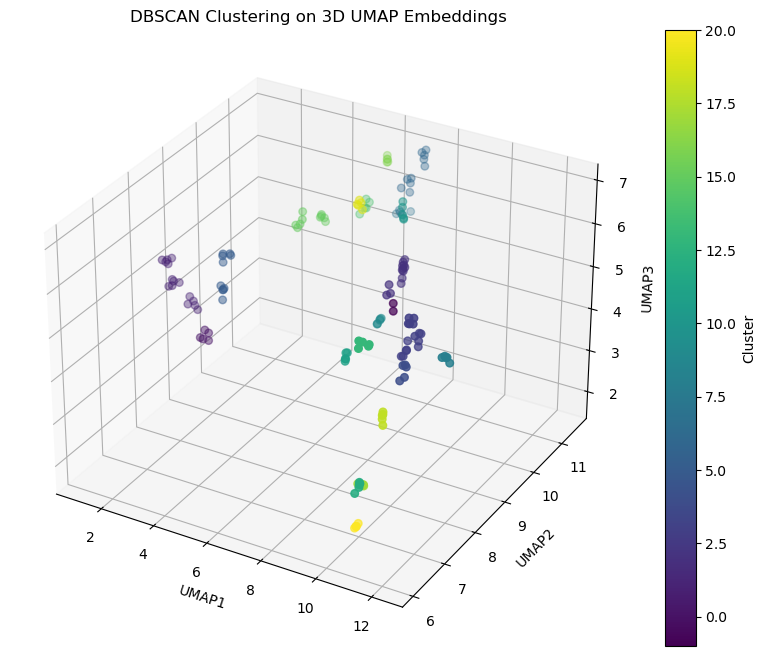

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot for DBSCAN clusters on 3D UMAP embedding
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(umap_df['UMAP1'], umap_df['UMAP2'], umap_df['UMAP3'], c=umap_df['Cluster'], cmap='viridis', s=30)

# Add labels and title
ax.set_title("DBSCAN Clustering on 3D UMAP Embeddings")
ax.set_xlabel("UMAP1")
ax.set_ylabel("UMAP2")
ax.set_zlabel("UMAP3")
plt.colorbar(sc, ax=ax, label="Cluster")
plt.show()


In [22]:
from sklearn.manifold import TSNE

In [23]:
# 2. Apply t-SNE for dimensionality reduction to 2D
tsne_model_2d = TSNE(n_components=2, random_state=42)
tsne_embeddings_2d = tsne_model_2d.fit_transform(embeddings_df)  # Assuming embeddings_df is your embeddings

# Create a DataFrame from t-SNE 2D embeddings
tsne_df_2d = pd.DataFrame(tsne_embeddings_2d, columns=['tSNE1', 'tSNE2'])

# Display the t-SNE DataFrame
print(tsne_df_2d.head())


      tSNE1     tSNE2
0  7.540836  3.445357
1  7.090683  3.461133
2  7.568714  3.182348
3  6.921782  3.442156
4  7.058686  3.076658


      tSNE1     tSNE2  Cluster_DBSCAN
0  7.540836  3.445357              -1
1  7.090683  3.461133              -1
2  7.568714  3.182348              -1
3  6.921782  3.442156              -1
4  7.058686  3.076658              -1


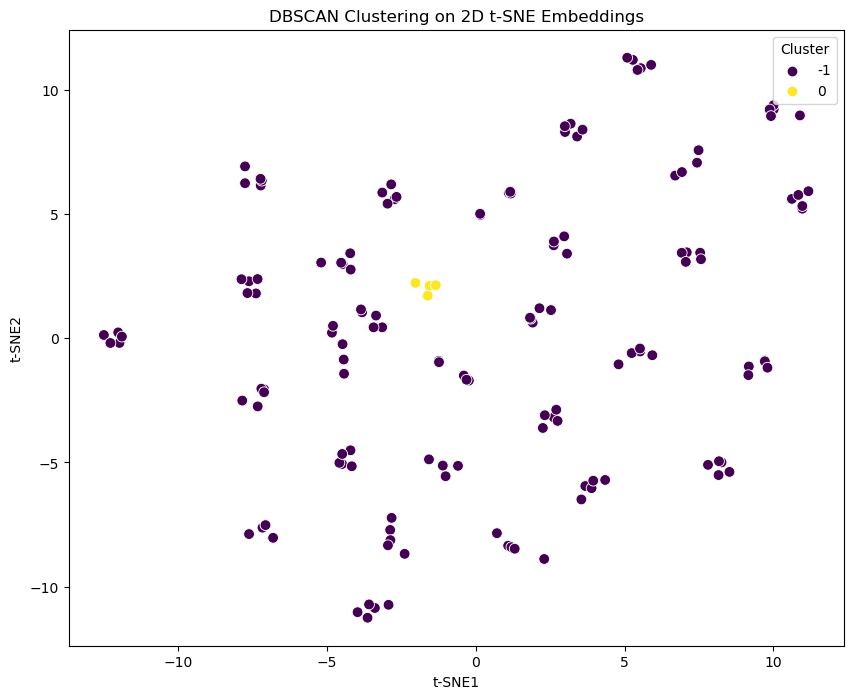

In [24]:
# 3. Apply DBSCAN clustering on the 2D t-SNE embeddings
dbscan_2d = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels_2d = dbscan_2d.fit_predict(tsne_df_2d)

# Add the cluster labels to the t-SNE DataFrame
tsne_df_2d['Cluster_DBSCAN'] = dbscan_labels_2d

# Display the t-SNE DataFrame with DBSCAN cluster labels
print(tsne_df_2d.head())

# 4. Scatter plot for DBSCAN clusters on 2D t-SNE embeddings
plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df_2d, x='tSNE1', y='tSNE2', hue='Cluster_DBSCAN', palette='viridis', s=60)
plt.title("DBSCAN Clustering on 2D t-SNE Embeddings")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend(title='Cluster')
plt.show()


In [26]:
# 7. Apply t-SNE for dimensionality reduction to 3D
tsne_model_3d = TSNE(n_components=3, random_state=42)
tsne_embeddings_3d = tsne_model_3d.fit_transform(embeddings_df)

# Create a DataFrame from t-SNE 3D embeddings
tsne_df_3d = pd.DataFrame(tsne_embeddings_3d, columns=['tSNE1', 'tSNE2', 'tSNE3'])

# Display the t-SNE DataFrame
print(tsne_df_3d.head())


       tSNE1      tSNE2      tSNE3
0 -53.153503  -1.133783  58.195904
1 -69.089836  -4.971448  46.376831
2 -59.354553 -18.230936  55.227356
3 -51.564640  -9.214908  39.697369
4 -57.310333   7.825916  41.379379


       tSNE1      tSNE2      tSNE3  Cluster_DBSCAN
0 -53.153503  -1.133783  58.195904              -1
1 -69.089836  -4.971448  46.376831              -1
2 -59.354553 -18.230936  55.227356              -1
3 -51.564640  -9.214908  39.697369              -1
4 -57.310333   7.825916  41.379379              -1


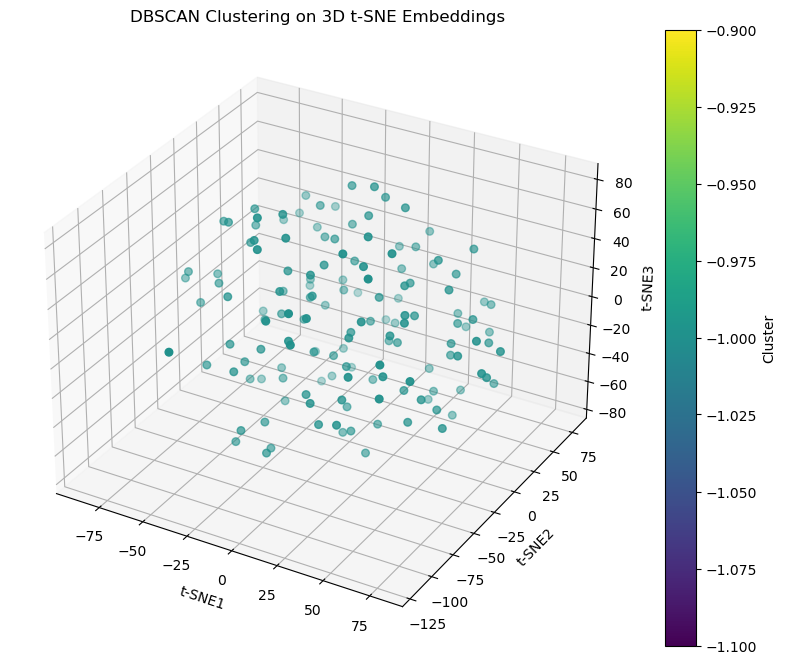

In [27]:
# 8. Apply DBSCAN clustering on the 3D t-SNE embeddings
dbscan_3d = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels_3d = dbscan_3d.fit_predict(tsne_df_3d)

# Add the cluster labels to the t-SNE DataFrame
tsne_df_3d['Cluster_DBSCAN'] = dbscan_labels_3d

# Display the t-SNE DataFrame with DBSCAN cluster labels
print(tsne_df_3d.head())

# 9. 3D scatter plot for DBSCAN clusters on 3D t-SNE embeddings
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(tsne_df_3d['tSNE1'], tsne_df_3d['tSNE2'], tsne_df_3d['tSNE3'], c=tsne_df_3d['Cluster_DBSCAN'], cmap='viridis', s=30)

# Add labels and title
ax.set_title("DBSCAN Clustering on 3D t-SNE Embeddings")
ax.set_xlabel("t-SNE1")
ax.set_ylabel("t-SNE2")
ax.set_zlabel("t-SNE3")
plt.colorbar(sc, ax=ax, label="Cluster")
plt.show()


In [32]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

# Function to compute evaluation metrics for clustering results
def evaluate_clustering(embedding_df, cluster_labels, model_name, embedding_dim, clustering_method):
    try:
        silhouette = silhouette_score(embedding_df, cluster_labels)
        davies_bouldin = davies_bouldin_score(embedding_df, cluster_labels)
        calinski_harabasz = calinski_harabasz_score(embedding_df, cluster_labels)

        print(f"{model_name} {embedding_dim}-D {clustering_method} - Silhouette Score: {silhouette:.3f}")
        print(f"{model_name} {embedding_dim}-D {clustering_method} - Davies-Bouldin Index: {davies_bouldin:.3f}")
        print(f"{model_name} {embedding_dim}-D {clustering_method} - Calinski-Harabasz Score: {calinski_harabasz:.3f}")
    except Exception as e:
        print(f"Error calculating metrics for {model_name} {embedding_dim}-D {clustering_method}: {e}")

# --- For UMAP 2D with DBSCAN ---
evaluate_clustering(tsne_df_2d[['tSNE1', 'tSNE2']], tsne_df_2d['Cluster_DBSCAN'], 't-SNE', 2, 'DBSCAN')


# --- For UMAP 3D with DBSCAN ---
evaluate_clustering(tsne_df_3d[['tSNE1', 'tSNE2', 'tSNE3']], tsne_df_3d['Cluster_DBSCAN'], 't-SNE', 3, 'DBSCAN')


# --- For t-SNE 2D with DBSCAN ---
evaluate_clustering(tsne_df_2d[['tSNE1', 'tSNE2']], dbscan_labels_2d, 't-SNE', 2, 'DBSCAN')

# --- For t-SNE 3D with DBSCAN ---
evaluate_clustering(tsne_df_3d[['tSNE1', 'tSNE2', 'tSNE3']], dbscan_labels_3d, 't-SNE', 3, 'DBSCAN')


t-SNE 2-D DBSCAN - Silhouette Score: -0.225
t-SNE 2-D DBSCAN - Davies-Bouldin Index: 3.029
t-SNE 2-D DBSCAN - Calinski-Harabasz Score: 0.501
Error calculating metrics for t-SNE 3-D DBSCAN: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
t-SNE 2-D DBSCAN - Silhouette Score: -0.225
t-SNE 2-D DBSCAN - Davies-Bouldin Index: 3.029
t-SNE 2-D DBSCAN - Calinski-Harabasz Score: 0.501
Error calculating metrics for t-SNE 3-D DBSCAN: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)


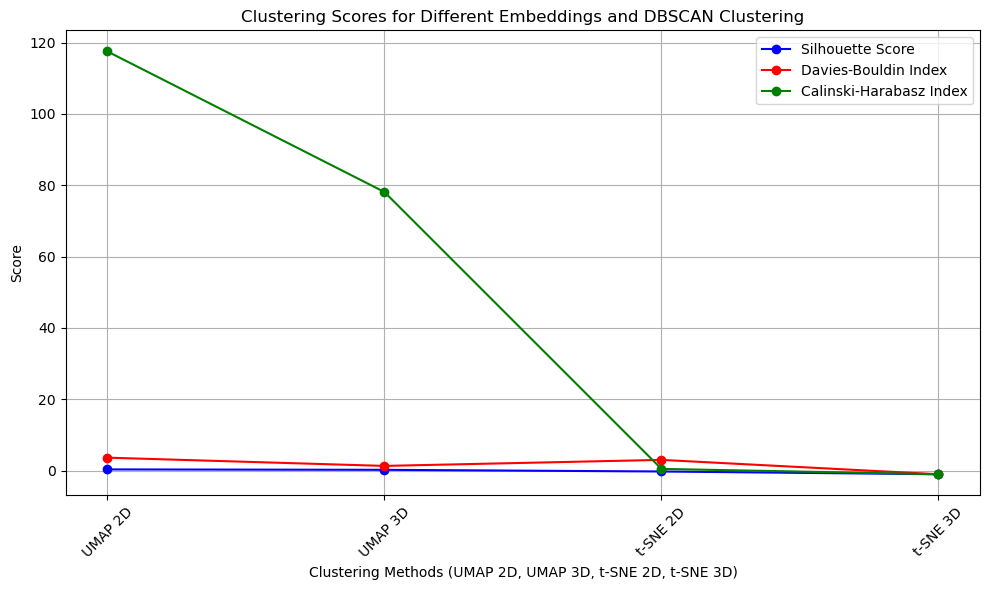

In [33]:
import matplotlib.pyplot as plt

# Data for plotting
methods = ['UMAP 2D', 'UMAP 3D', 't-SNE 2D', 't-SNE 3D']
silhouette_scores = [0.3556404709815979, 0.2414819896221161, -0.225, -1]  # t-SNE 3D is invalid
db_indexes = [3.6496158147428934, 1.3364741245098422, 3.029, -1]  # t-SNE 3D is invalid
ch_scores = [117.50499438227625, 78.10929458672956, 0.501, -1]  # t-SNE 3D is invalid

# Set up the plot
plt.figure(figsize=(10, 6))

# Plotting Silhouette Score
plt.plot(methods, silhouette_scores, marker='o', label='Silhouette Score', linestyle='-', color='b')

# Plotting Davies-Bouldin Index
plt.plot(methods, db_indexes, marker='o', label='Davies-Bouldin Index', linestyle='-', color='r')

# Plotting Calinski-Harabasz Index
plt.plot(methods, ch_scores, marker='o', label='Calinski-Harabasz Index', linestyle='-', color='g')

# Customizing the plot
plt.title('Clustering Scores for Different Embeddings and DBSCAN Clustering')
plt.xlabel('Clustering Methods (UMAP 2D, UMAP 3D, t-SNE 2D, t-SNE 3D)')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()
